### Problem Statement:
The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.

The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.

### Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

### Data Dictionary link
https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [2]:
df=pd.read_csv("SCMS_Delivery_History_Dataset.csv")

### Setting the display options

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Observing Head and Tail of the Dataset

In [4]:
display(df.head())
display(df.tail())

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Shape of the Dataset

In [5]:
print('The Shape of the Dataset is :{}'.format(df.shape))

The Shape of the Dataset is :(10324, 33)


### Info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Checking the null value count

In [7]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Checking for Duplicates in the dataset

In [8]:
df.duplicated().sum()

0

### Descriptive Stats of Numeric and Categorical data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [10]:
df.describe(include=object).T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


### EDA

* Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments
* The function will display the statistical description of the numeric variable,skewness,histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of ID
----------------------------------------------------------------------------
count    10324.000000
mean     51098.968229
std      31944.332496
min          1.000000
25%      12795.750000
50%      57540.500000
75%      83648.250000
max      86823.000000
Name: ID, dtype: float64

 Skewness of ID
----------------------------------------------------------------------------
-0.2304

 Histogram and Boxplot of ID
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


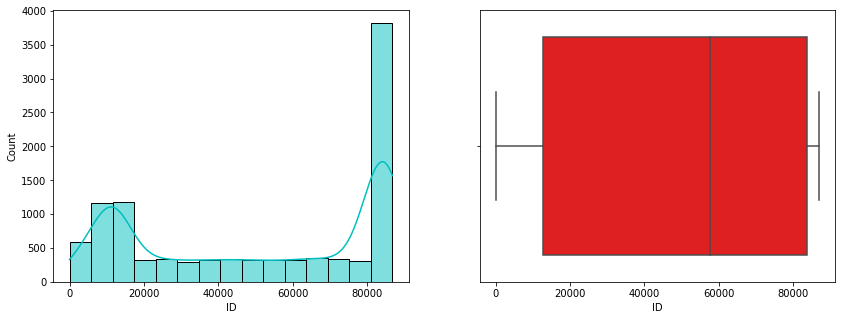

None
Description of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
count    10324.000000
mean        77.990895
std         76.579764
min          1.000000
25%         30.000000
50%         60.000000
75%         90.000000
max       1000.000000
Name: Unit of Measure (Per Pack), dtype: float64

 Skewness of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
4.3025

 Histogram and Boxplot of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


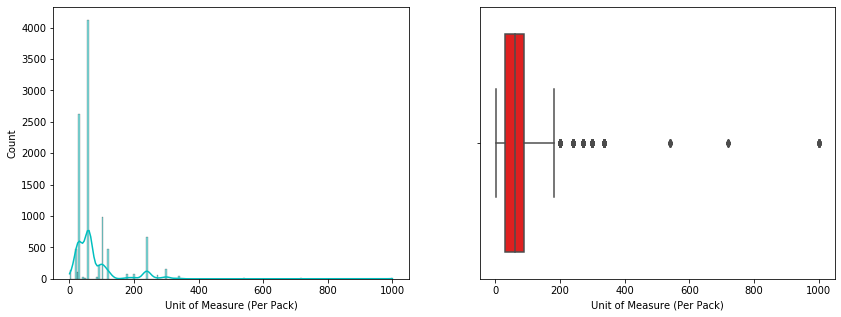

None
Description of Line Item Quantity
----------------------------------------------------------------------------
count     10324.000000
mean      18332.534870
std       40035.302961
min           1.000000
25%         408.000000
50%        3000.000000
75%       17039.750000
max      619999.000000
Name: Line Item Quantity, dtype: float64

 Skewness of Line Item Quantity
----------------------------------------------------------------------------
5.0383

 Histogram and Boxplot of Line Item Quantity
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


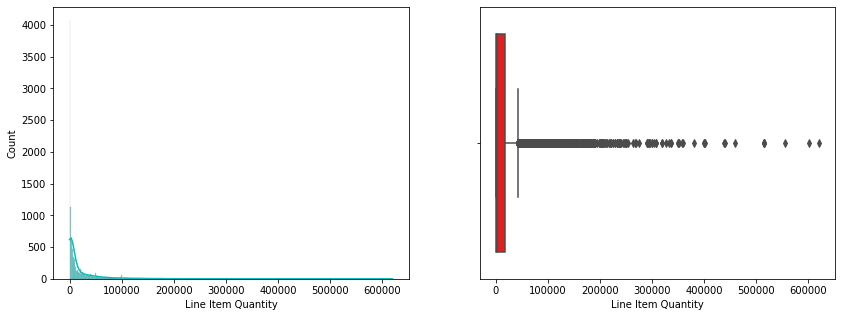

None
Description of Line Item Value
----------------------------------------------------------------------------
count    1.032400e+04
mean     1.576506e+05
std      3.452921e+05
min      0.000000e+00
25%      4.314593e+03
50%      3.047147e+04
75%      1.664471e+05
max      5.951990e+06
Name: Line Item Value, dtype: float64

 Skewness of Line Item Value
----------------------------------------------------------------------------
5.837

 Histogram and Boxplot of Line Item Value
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


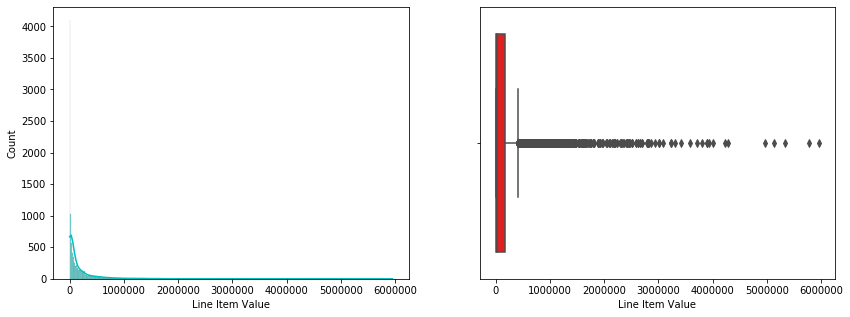

None
Description of Pack Price
----------------------------------------------------------------------------
count    10324.000000
mean        21.910241
std         45.609223
min          0.000000
25%          4.120000
50%          9.300000
75%         23.592500
max       1345.640000
Name: Pack Price, dtype: float64

 Skewness of Pack Price
----------------------------------------------------------------------------
12.9884

 Histogram and Boxplot of Pack Price
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


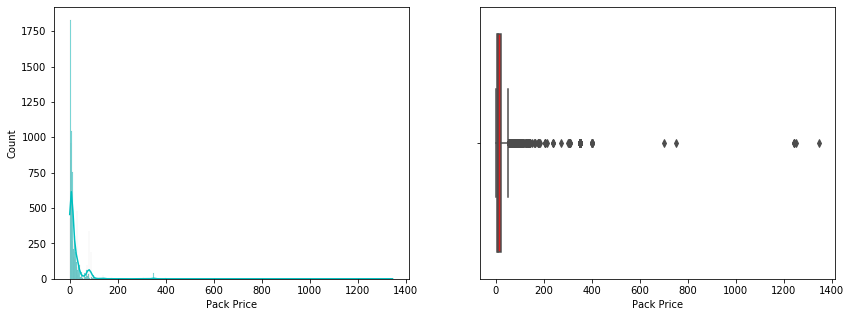

None
Description of Unit Price
----------------------------------------------------------------------------
count    10324.000000
mean         0.611701
std          3.275808
min          0.000000
25%          0.080000
50%          0.160000
75%          0.470000
max        238.650000
Name: Unit Price, dtype: float64

 Skewness of Unit Price
----------------------------------------------------------------------------
40.5848

 Histogram and Boxplot of Unit Price
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


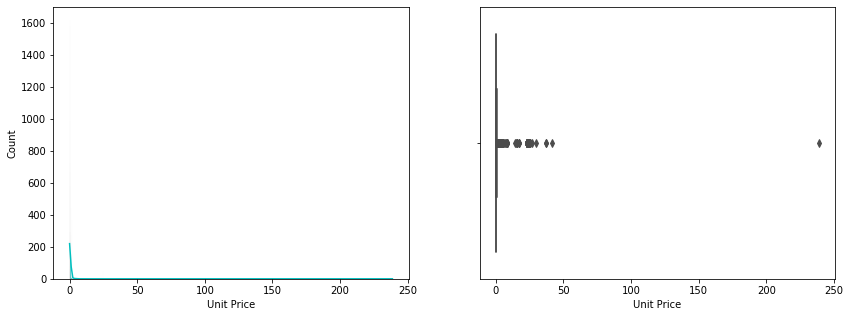

None
Description of Line Item Insurance (USD)
----------------------------------------------------------------------------
count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

 Skewness of Line Item Insurance (USD)
----------------------------------------------------------------------------
4.8272

 Histogram and Boxplot of Line Item Insurance (USD)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


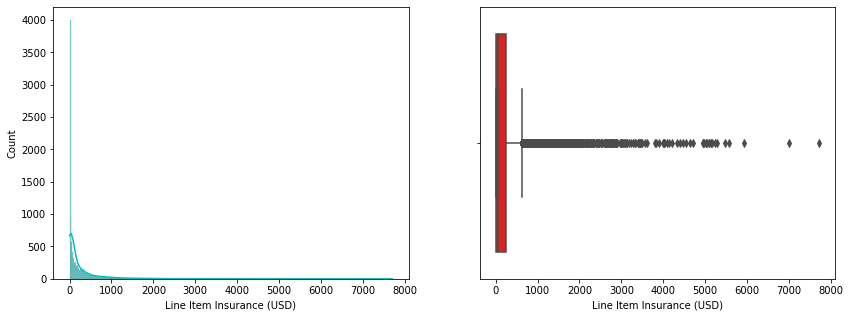

None


In [12]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(univariateAnalysis_numeric(column,60))
       

### Visualizing Missing Values

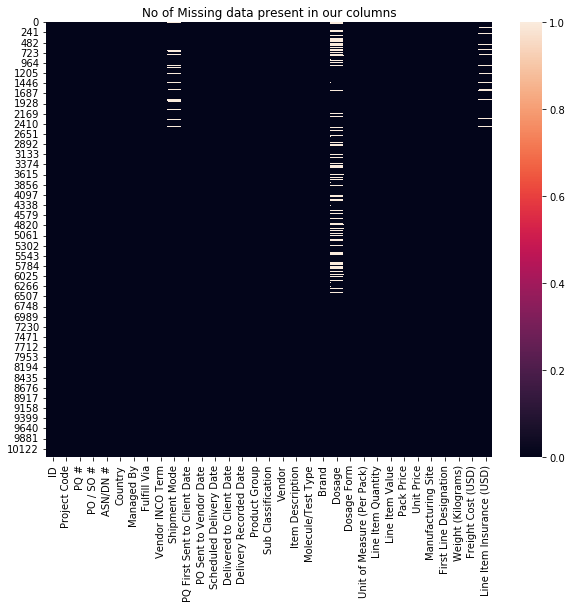

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In [14]:
# Changing column names to lower case and removing unwanted spaces 
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

### Missing Data imputation

In [15]:
missing_data=df[["shipment_mode","dosage","line_item_insurance_(usd)"]]

In [16]:
missing_data.head()

,shipment_mode,dosage,line_item_insurance_(usd)
0,Air,NaN,NaN
1,Air,10mg/ml,NaN
2,Air,NaN,NaN
3,Air,150mg,NaN
4,Air,30mg,NaN


In [17]:
for cols in missing_data.columns[0:]:
        print(cols,"has",df[cols].isna().sum(),"missing values")

shipment_mode has 360 missing values
dosage has 1736 missing values
line_item_insurance_(usd) has 287 missing values


### Shipment Mode

In [18]:
def plot(df,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    df.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    sm=df.value_counts().index
    df.value_counts().plot.pie(labels=sm,autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

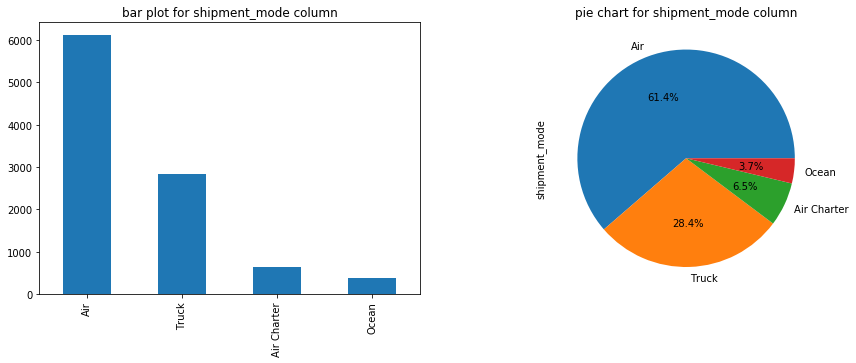

In [19]:
plot(df['shipment_mode'],"shipment_mode")

In [20]:
missing_data["shipment_mode"].fillna("Air",inplace=True)
missing_data["shipment_mode"].value_counts(dropna=False)

Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

### Dosage

In [21]:
Percent_missing_values=df["dosage"].isnull().sum()/df.shape[0]
print('% Missing Values in Dosage =',np.round(Percent_missing_values,2)*100)

% Missing Values in Dosage = 17.0


In [22]:
df["dosage"].value_counts().head()

300mg            990
200mg            932
600mg            772
150/300mg        600
150/300/200mg    580
Name: dosage, dtype: int64

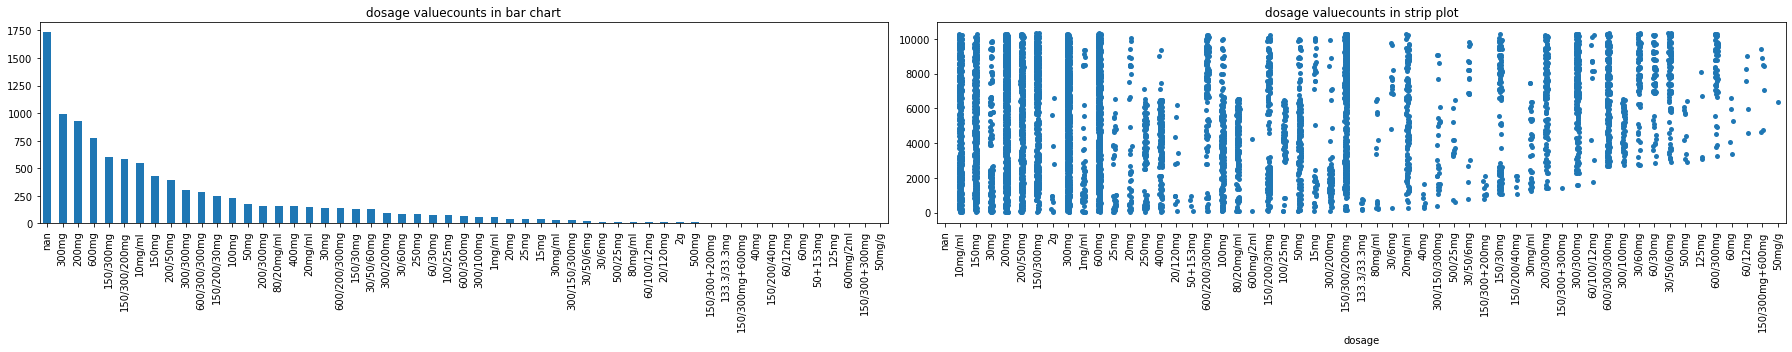

In [23]:
fig=plt.figure(figsize=(25,5))
ax0=fig.add_subplot(121)
df["dosage"].value_counts(dropna=False).plot.bar()
plt.title("dosage valuecounts in bar chart")

ax1=fig.add_subplot(122)
x=df["dosage"]
y=df.index
plt.xticks(rotation=90)
sns.stripplot(x=x,y=y)
plt.title("dosage valuecounts in strip plot")
plt.tight_layout()
plt.show()

In [24]:
# Better to drop this column as imputing 17% of missing data would not be good for model building
missing_data.drop("dosage",axis=1,inplace=True)

### Line Item Insurance (usd)

In [25]:
missing_data["line_item_insurance_(usd)"].value_counts().head()

0.00    54
0.02    37
0.07    33
0.06    30
0.05    30
Name: line_item_insurance_(usd), dtype: int64

In [26]:
missing_data["line_item_insurance_(usd)"].replace(to_replace = np.NaN, value = missing_data["line_item_insurance_(usd)"].median(),inplace=True)

In [27]:
missing_data.isnull().sum()

shipment_mode                0
line_item_insurance_(usd)    0
dtype: int64

In [28]:
# Dropping the original columns
df.drop(["shipment_mode","line_item_insurance_(usd)","dosage"],axis=1,inplace=True)

In [29]:
# Concatenating the imputed columns
df=pd.concat([df,missing_data],axis=1)

In [30]:
# Dropping some columns which are not helpful in Model Building
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   po_/_so_#                     10324 non-null  object 
 1   asn/dn_#                      10324 non-null  object 
 2   country                       10324 non-null  object 
 3   managed_by                    10324 non-null  object 
 4   fulfill_via                   10324 non-null  object 
 5   vendor_inco_term              10324 non-null  object 
 6   pq_first_sent_to_client_date  10324 non-null  object 
 7   po_sent_to_vendor_date        10324 non-null  object 
 8   scheduled_delivery_date       10324 non-null  object 
 9   delivered_to_client_date      10324 non-null  object 
 10  delivery_recorded_date        10324 non-null  object 
 11  product_group                 10324 non-null  object 
 12  sub_classification            10324 non-null  object 
 13  v

In [32]:
# Separating Numeric and object datatype data and storing them separately for analysis
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]

num_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]

In [33]:
numcols=df[num_cols]

objcols=df[obj_cols]

In [34]:
# Unique count in Object data
for cols in objcols.columns[0:]:
    print(cols,"=",len(objcols[cols].unique()))

po_/_so_# = 6233
asn/dn_# = 7030
country = 43
managed_by = 4
fulfill_via = 2
vendor_inco_term = 8
pq_first_sent_to_client_date = 765
po_sent_to_vendor_date = 897
scheduled_delivery_date = 2006
delivered_to_client_date = 2093
delivery_recorded_date = 2042
product_group = 5
sub_classification = 6
vendor = 73
item_description = 184
molecule/test_type = 86
brand = 48
dosage_form = 17
manufacturing_site = 88
first_line_designation = 2
weight_(kilograms) = 4688
freight_cost_(usd) = 6733
shipment_mode = 4


### PO/SO

In [35]:
print(df["po_/_so_#"].value_counts().head(),'\n')
print(df["po_/_so_#"].value_counts().tail())

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
Name: po_/_so_#, dtype: int64 

SO-36423      1
SCMS-12680    1
SCMS-69260    1
SCMS-77270    1
SO-34250      1
Name: po_/_so_#, dtype: int64


In [36]:
df["po_/_so_#"].value_counts().head()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
Name: po_/_so_#, dtype: int64

#### The function reorder takes a string as input and returns a new string after performing some operations on it.

* Here's how the function works:

* The input string is passed to the function as the argument df.
* The string is split into a list of substrings using the split() method. The delimiter used to split the string is the hyphen (-). The resulting list is stored in the variable df_split.
* The first element of the list (index 0) is extracted and stored in the variable df_return.
* Finally, the function returns the value stored in df_return.For example, if you call reorder with the input string "SO-4568", the function will split the string into a list ["SO", "4568"] and return the string "SO".

In [37]:
def reorder(df):
    df_split=df.split("-")
    df_return=df_split[0]
    return df_return

In [38]:
df["po_/_so_#"]=df["po_/_so_#"].apply(reorder)
df["po_/_so_#"].value_counts()

SO      5404
SCMS    4919
DSCM       1
Name: po_/_so_#, dtype: int64

In [39]:
df["po_/_so_#"]=df["po_/_so_#"].replace('DSCM',"SO")

In [40]:
df["po_/_so_#"].value_counts()

SO      5405
SCMS    4919
Name: po_/_so_#, dtype: int64

### DN / ASN

In [41]:
df["asn/dn_#"].value_counts().head()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
DN-304       17
Name: asn/dn_#, dtype: int64

In [42]:
df["asn/dn_#"].value_counts().tail()

ASN-7957     1
ASN-29373    1
DN-228       1
DN-606       1
ASN-11433    1
Name: asn/dn_#, dtype: int64

In [43]:
# Applying the Reorder function
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)
df["asn/dn_#"].value_counts()

DN     5404
ASN    4920
Name: asn/dn_#, dtype: int64

* DN / ASN = Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries

* DN(Delivery Note) is most used or preferred for Shipment Number

### Country

In [44]:
print(df["country"].value_counts().head(),'\n')
print(df["country"].value_counts().tail())

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Name: country, dtype: int64 

Burkina Faso    2
Kazakhstan      2
Kyrgyzstan      2
Belize          1
Guinea          1
Name: country, dtype: int64


Text(0.5, 0, 'Country Name')

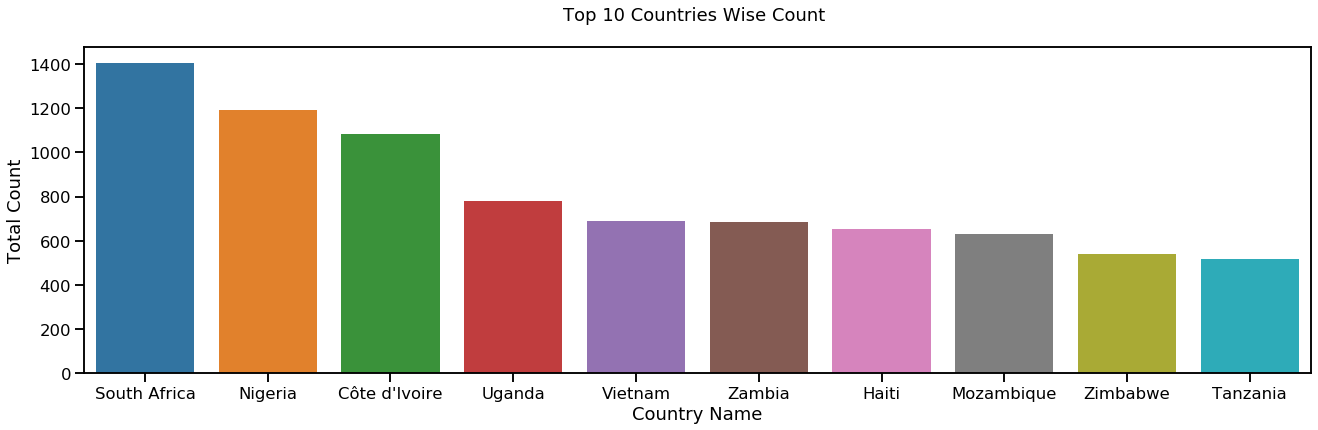

In [45]:
Count = df["country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(x=df['country'],order = Count.index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

* South Africa is the most preferred Destination country for the shipments followed by Nigeria , Côte d'Ivoire while Guinea and Belize being the least.

### Managed_by

In [46]:
df["managed_by"].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: managed_by, dtype: int64

In [47]:
np.round(df["managed_by"].value_counts(normalize=True)*100,2)

PMO - US                     99.43
South Africa Field Office     0.55
Haiti Field Office            0.01
Ethiopia Field Office         0.01
Name: managed_by, dtype: float64

* Managed By = SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
* Almost all the Management office are located in US hence it does not provide any useful information so,we can drop it from our variables.

In [48]:
df.drop("managed_by",axis=1,inplace=True)

### Fulfill_via

In [49]:
df["fulfill_via"].value_counts()

From RDC       5404
Direct Drop    4920
Name: fulfill_via, dtype: int64

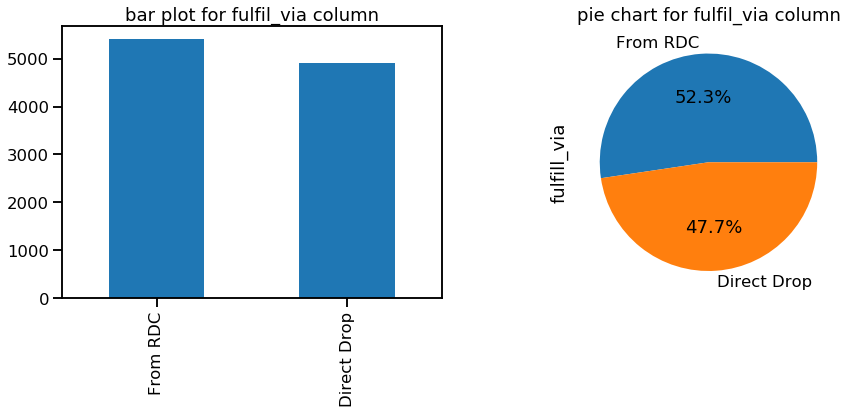

In [50]:
plot(df["fulfill_via"],"fulfil_via")

### Vendor_inco_term

In [51]:
df["vendor_inco_term"].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: vendor_inco_term, dtype: int64

In [52]:
np.round(df["vendor_inco_term"].value_counts(normalize=True),2)

N/A - From RDC    0.52
EXW               0.27
DDP               0.14
FCA               0.04
CIP               0.03
DDU               0.00
DAP               0.00
CIF               0.00
Name: vendor_inco_term, dtype: float64

### PQ_first_sent_to_client_date

In [53]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

Pre-PQ Process       2476
9/11/14               205
Date Not Captured     205
7/11/13               173
4/30/14               123
Name: pq_first_sent_to_client_date, dtype: int64 

12/10/10    1
12/3/13     1
5/31/13     1
6/15/12     1
7/2/13      1
Name: pq_first_sent_to_client_date, dtype: int64


In [54]:
df["pq_first_sent_to_client_date"].nunique()

765

In [55]:
df["pq_first_sent_to_client_date"].min()

'1/10/12'

In [56]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [57]:
df["pq_first_sent_to_client_date"].describe(include=all)

count              10324
unique               765
top       Pre-PQ Process
freq                2476
Name: pq_first_sent_to_client_date, dtype: object

In [58]:
df.describe(include='all')["pq_first_sent_to_client_date"]

count              10324
unique               765
top       Pre-PQ Process
freq                2476
mean                 NaN
std                  NaN
min                  NaN
25%                  NaN
50%                  NaN
75%                  NaN
max                  NaN
Name: pq_first_sent_to_client_date, dtype: object

#### Function called client_dates
* This code is a function called client_dates that takes in a date as a string. The function has three branches. The first branch checks if the input date is equal to the string "Pre-PQ Process", and if so, it returns a specific pre-defined date in the format "%d/%m/%Y" using the pd.to_datetime function from the pandas library.
* The second branch checks if the input date is equal to the string "Date Not Captured", and if so, it returns the string "Date Not Captured" without modifying it.
* The third branch is executed if the input date is not equal to either of the previous two strings. This branch checks if the length of the input date string is less than 9 characters, and if so, it converts the date to the format "%m/%d/%y" using the pd.to_datetime function and returns the date.
* If the length of the input date string is not less than 9 characters, it replaces all occurrences of the character "-" with the character "/" in the input date string and then converts the date to the format "%d/%m/%Y" using the pd.to_datetime function and returns the date.

In [59]:
# Checking the length of Date and hence using len(date)<9
a=len('10/21/13')
a

8

In [60]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [61]:
df["pq_first_sent_to_client_date"]=df["pq_first_sent_to_client_date"].apply(client_dates)

In [62]:
df["pq_first_sent_to_client_date"].head(5)

0    2009-06-01 00:00:00
1    2009-06-01 00:00:00
2    2009-06-01 00:00:00
3    2009-06-01 00:00:00
4    2009-06-01 00:00:00
Name: pq_first_sent_to_client_date, dtype: object

In [63]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

2009-06-01 00:00:00    2476
Date Not Captured       205
2014-09-11 00:00:00     205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
Name: pq_first_sent_to_client_date, dtype: int64 

2014-07-18    1
2015-04-16    1
2010-04-16    1
2015-01-12    1
2010-03-24    1
Name: pq_first_sent_to_client_date, dtype: int64


In [64]:
df.drop(df.index[df["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [65]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

2009-06-01    2476
2014-09-11     205
2013-07-11     173
2014-04-30     123
2009-11-06      98
Name: pq_first_sent_to_client_date, dtype: int64 

2010-01-25    1
2012-02-08    1
2010-09-21    1
2011-03-22    1
2014-12-19    1
Name: pq_first_sent_to_client_date, dtype: int64


### PO_sent_to_vendor_date

In [66]:
print(df["po_sent_to_vendor_date"].value_counts().head(),'\n')
print(df["po_sent_to_vendor_date"].value_counts().tail())

N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: po_sent_to_vendor_date, dtype: int64 

9/12/14     1
1/20/15     1
10/21/11    1
5/13/13     1
12/3/13     1
Name: po_sent_to_vendor_date, dtype: int64


In [67]:
df["po_sent_to_vendor_date"].value_counts(normalize=True).head(6)*100

N/A - From RDC       51.378595
Date Not Captured     3.241427
8/27/14               0.790592
3/19/10               0.770827
8/29/14               0.751062
10/9/14               0.701650
Name: po_sent_to_vendor_date, dtype: float64

* po_sent_to_vendor_date = Date the PO is first sent to the vendor
* Dropping column as it's more than 50% infomation is captured by from RDC which is categorical and unknown to us.

In [68]:
df.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

### Scheduled_delivery_date

In [69]:
df["scheduled_delivery_date"].value_counts().head()

29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
Name: scheduled_delivery_date, dtype: int64

In [70]:
df["scheduled_delivery_date"].value_counts().tail()

6-Feb-07     1
16-Apr-07    1
9-May-11     1
8-Feb-08     1
21-Jan-15    1
Name: scheduled_delivery_date, dtype: int64

This function transforms a string representation of a date in the format "DD-MMM-YY" (e.g. "16-Jan-22") into a pandas datetime object. The function does this in three steps:

* The first line of the function uses the .replace() method to replace all hyphens (-) in the input string data with forward slashes (/). This is done because the pd.to_datetime() function expects the input string to be in the format "DD/MMM/YY", where "DD" is the day of the month, "MMM" is the three-letter abbreviation for the month, and "YY" is the two-digit year.

* The second line of the function uses the pd.to_datetime() function to convert the modified string into a pandas datetime object. The format parameter is set to "%d/%b/%y", which specifies the format of the input string. The %d directive represents the day of the month (as a zero-padded two-digit number), the %b directive represents the three-letter abbreviation for the month, and the %y directive represents the two-digit year.

* The third and final line of the function returns the resulting pandas datetime object.


In [71]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [72]:
df["scheduled_delivery_date"]=df["scheduled_delivery_date"].apply(transform_date)
df["scheduled_delivery_date"].value_counts().head()

2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
Name: scheduled_delivery_date, dtype: int64

In [73]:
df["delivery_recorded_date"]=df["delivery_recorded_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
Name: delivered_to_client_date, dtype: int64

### Delivered_to_client_date

In [74]:
df["delivered_to_client_date"]=df["delivered_to_client_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

2014-08-29    74
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
Name: delivered_to_client_date, dtype: int64

### Product Group

In [75]:
df["product_group"].value_counts()

ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: product_group, dtype: int64

In [76]:
np.round(df["product_group"].value_counts(normalize=True)*100,2)

ARV     82.47
HRDT    17.08
ANTM     0.22
ACT      0.16
MRDT     0.08
Name: product_group, dtype: float64

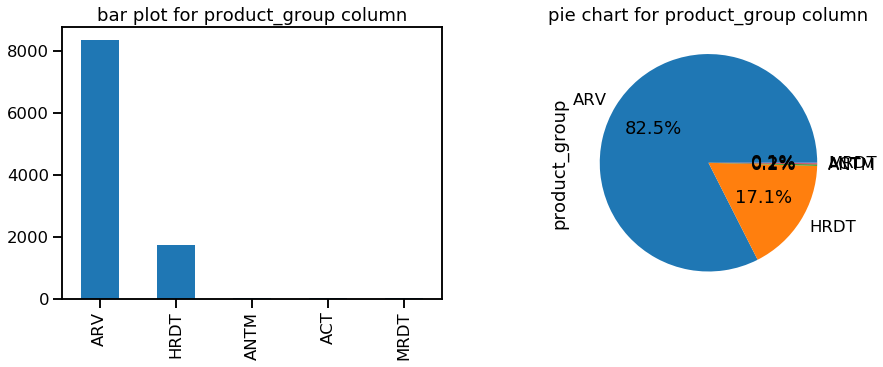

In [77]:
plot(df["product_group"],"product_group")

Text(0.5, 1.0, 'bar chart for product group')

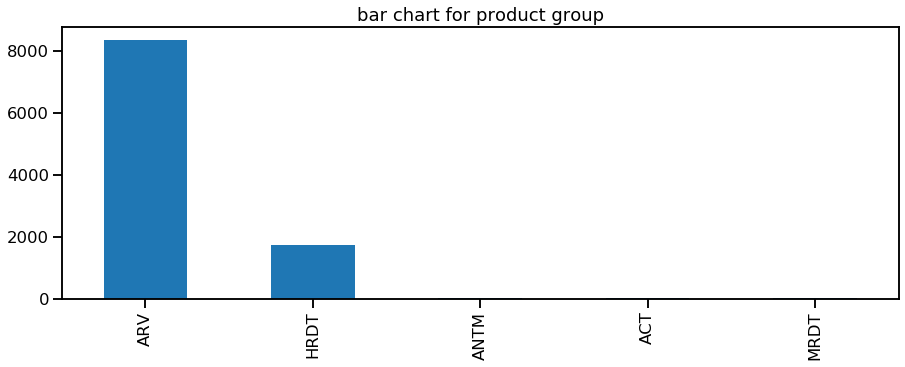

In [78]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

In [79]:
other_product=df["product_group"].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key) 

In [80]:
df["product_group"]=df["product_group"].replace(HRDT,"other")

In [81]:
df["product_group"].value_counts()

ARV      8345
other    1774
Name: product_group, dtype: int64

Text(0.5, 1.0, 'bar chart for product group')

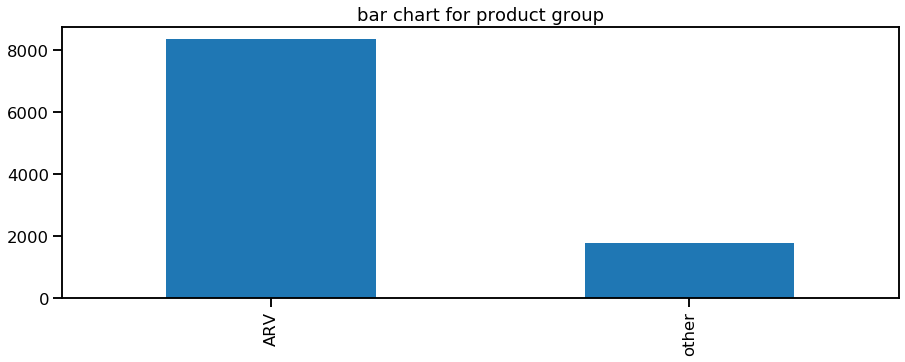

In [82]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

### Sub Classification

In [83]:
df["sub_classification"].value_counts()

Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: sub_classification, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

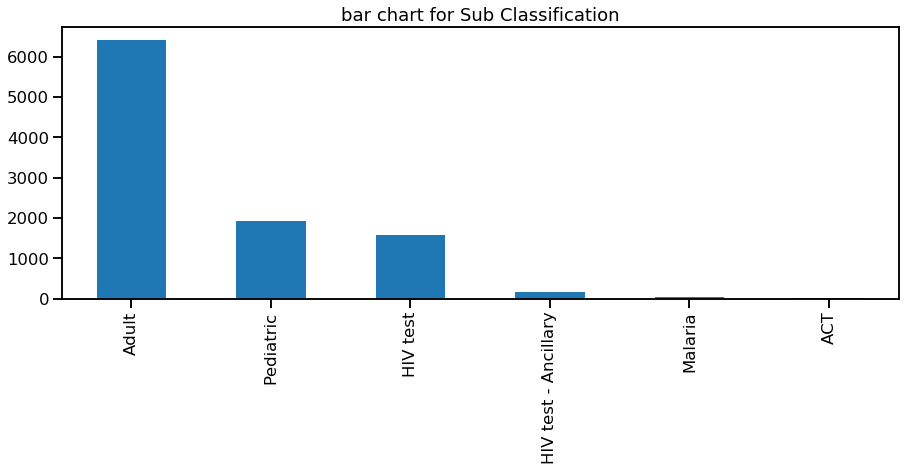

In [84]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

In [85]:
other_class=df["sub_classification"].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key) 

In [86]:
df["sub_classification"]=df["sub_classification"].replace(HIV_plus,"HIV+")

In [87]:
df["sub_classification"].value_counts()

Adult        6418
Pediatric    1927
HIV+         1774
Name: sub_classification, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

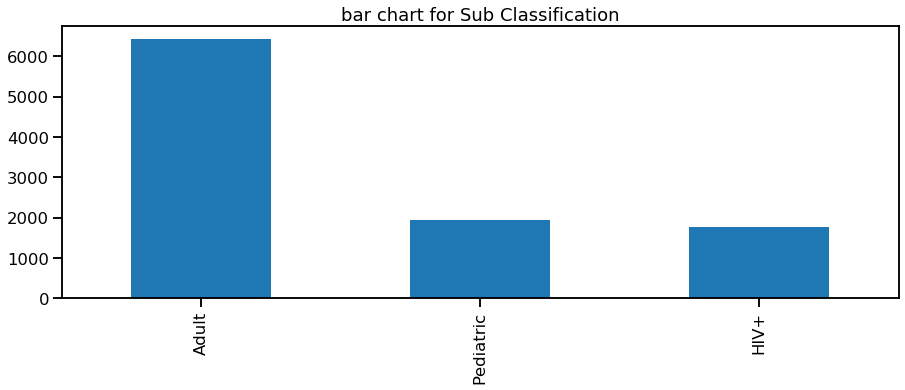

In [88]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

### Vendor

In [89]:
df["vendor"].value_counts().head()

SCMS from RDC               5199
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: vendor, dtype: int64

In [90]:
df["vendor"].value_counts().tail()

RAININ INSTRUMENT, LLC.              1
ABBOTT LABORATORIES (PUERTO RICO)    1
SETEMA LIMITED PLC                   1
PLURIPHARM S.A.                      1
SYSMEX AMERICA INC                   1
Name: vendor, dtype: int64

In [91]:
df["vendor"].value_counts(normalize=True).head()

SCMS from RDC               0.513786
Orgenics, Ltd               0.074513
S. BUYS WHOLESALER          0.070659
Aurobindo Pharma Limited    0.066014
Trinity Biotech, Plc        0.035181
Name: vendor, dtype: float64

In [92]:
other_vendor=df["vendor"].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key)  

In [93]:
df["vendor"]=df["vendor"].replace(other_catv,"other")

Text(0.5, 1.0, 'bar chart for vendor column')

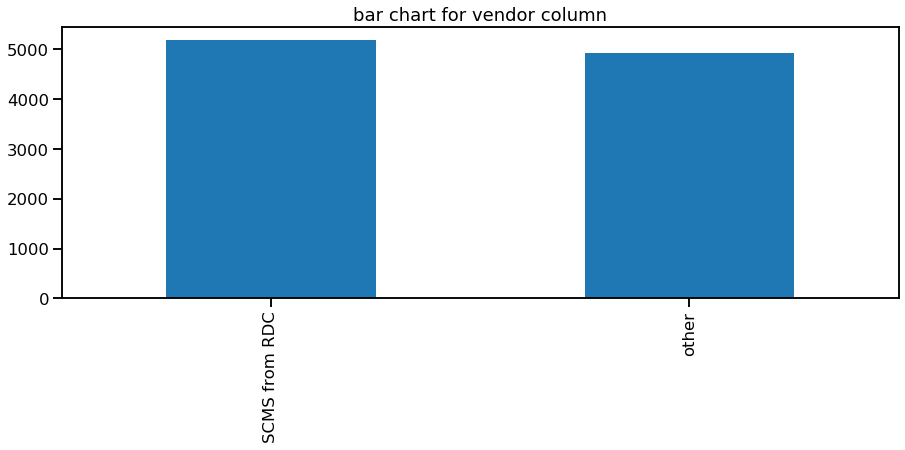

In [94]:
plt.figure(figsize=(15,5))
df["vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [95]:
df["vendor"].value_counts(normalize=True)

SCMS from RDC    0.513786
other            0.486214
Name: vendor, dtype: float64

### Item_description

In [96]:
df["item_description"].value_counts().head()

Efavirenz 600mg, tablets, 30 Tabs                                   733
Nevirapine 200mg, tablets, 60 Tabs                                  605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    554
Name: item_description, dtype: int64

In [97]:
df["item_description"].value_counts().tail()

HIV 1/2, INSTI HIV Antibody Individual POC, 1 Test                               1
Malaria Antigen P.f Kit, 30 x 1 Test                                             1
Efavirenz 200mg, tablets, 30 Tabs                                                1
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs    1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                     1
Name: item_description, dtype: int64

In [98]:
df.drop("item_description",axis=1,inplace=True)

### Molecule/test_type

In [99]:
df["molecule/test_type"].value_counts().head()

Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
Name: molecule/test_type, dtype: int64

In [100]:
df["molecule/test_type"].value_counts().tail()

Quinine (as sulfate)                         1
Mefloquine (as hydrochloride)                1
Malaria Antigen P.f Kit, 30 x 1 Test         1
Primaquine base (as diphosphate)             1
Malaria, Antigen P.f., HRP2 CareStart Kit    1
Name: molecule/test_type, dtype: int64

In [101]:
# Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.
df.drop("molecule/test_type",axis=1,inplace=True)

### Brand

In [102]:
df["brand"].value_counts().head()

Generic      7098
Determine     799
Uni-Gold      373
Aluvia        250
Kaletra       161
Name: brand, dtype: int64

In [103]:
df["brand"].value_counts().tail()

Bundi          2
InstantCHEK    2
Visitect       1
CareStart      1
Pepti-LAV      1
Name: brand, dtype: int64

In [104]:
df["brand"].value_counts(normalize=True).head()

Generic      0.701453
Determine    0.078960
Uni-Gold     0.036861
Aluvia       0.024706
Kaletra      0.015911
Name: brand, dtype: float64

In [105]:
other_brand=df["brand"].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=1000:
        other_catb.append(key)  

In [106]:
df["brand"]=df["brand"].replace(other_catb,"other")

In [107]:
def barplot(df,cols):
    plt.figure(figsize=(25,10))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

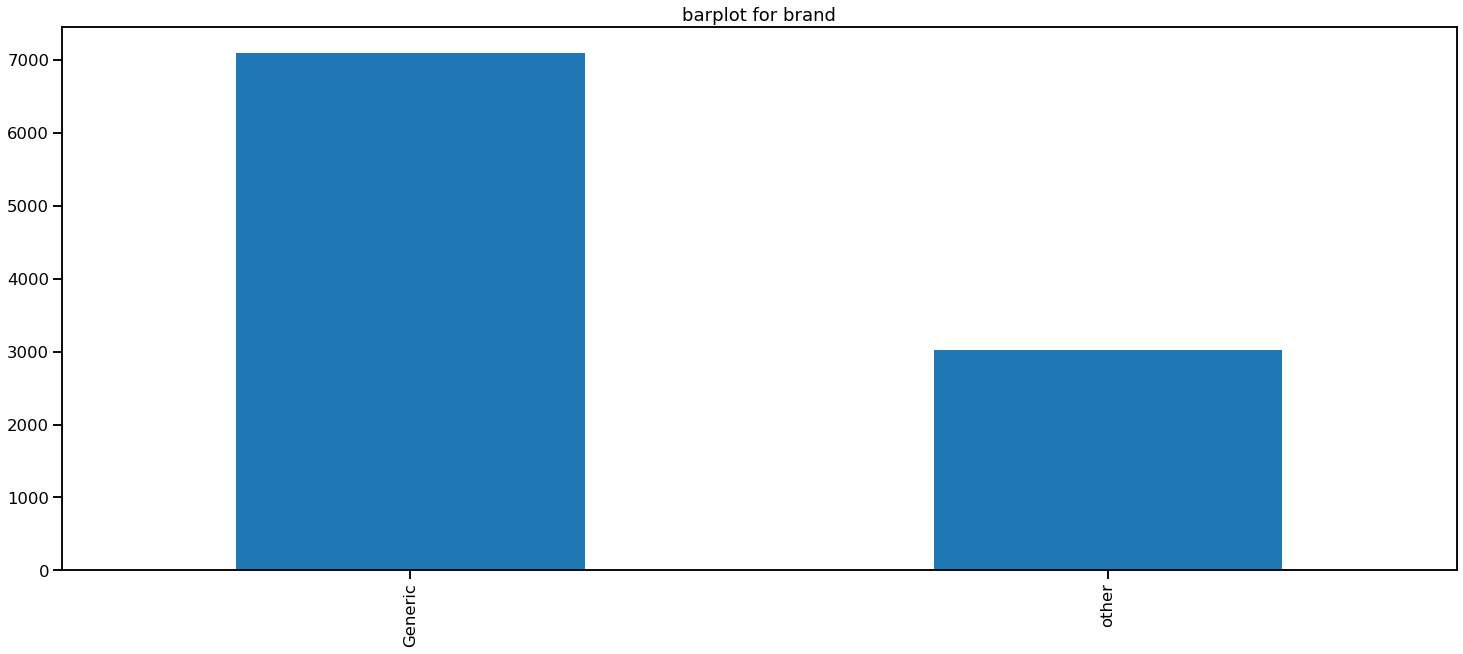

In [108]:
barplot(df["brand"],"brand")

### Dosage_form

In [109]:
df["dosage_form"].value_counts().head()

Tablet           3462
Tablet - FDC     2659
Test kit         1575
Oral solution     712
Capsule           706
Name: dosage_form, dtype: int64

In [110]:
df["dosage_form"].value_counts().tail()

Tablet - FDC + co-blister    20
Tablet - FDC + blister       15
Tablet - blister             10
Injection                     6
Oral powder                   1
Name: dosage_form, dtype: int64

In [111]:
def barplot(df,cols):
    plt.figure(figsize=(25,10))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

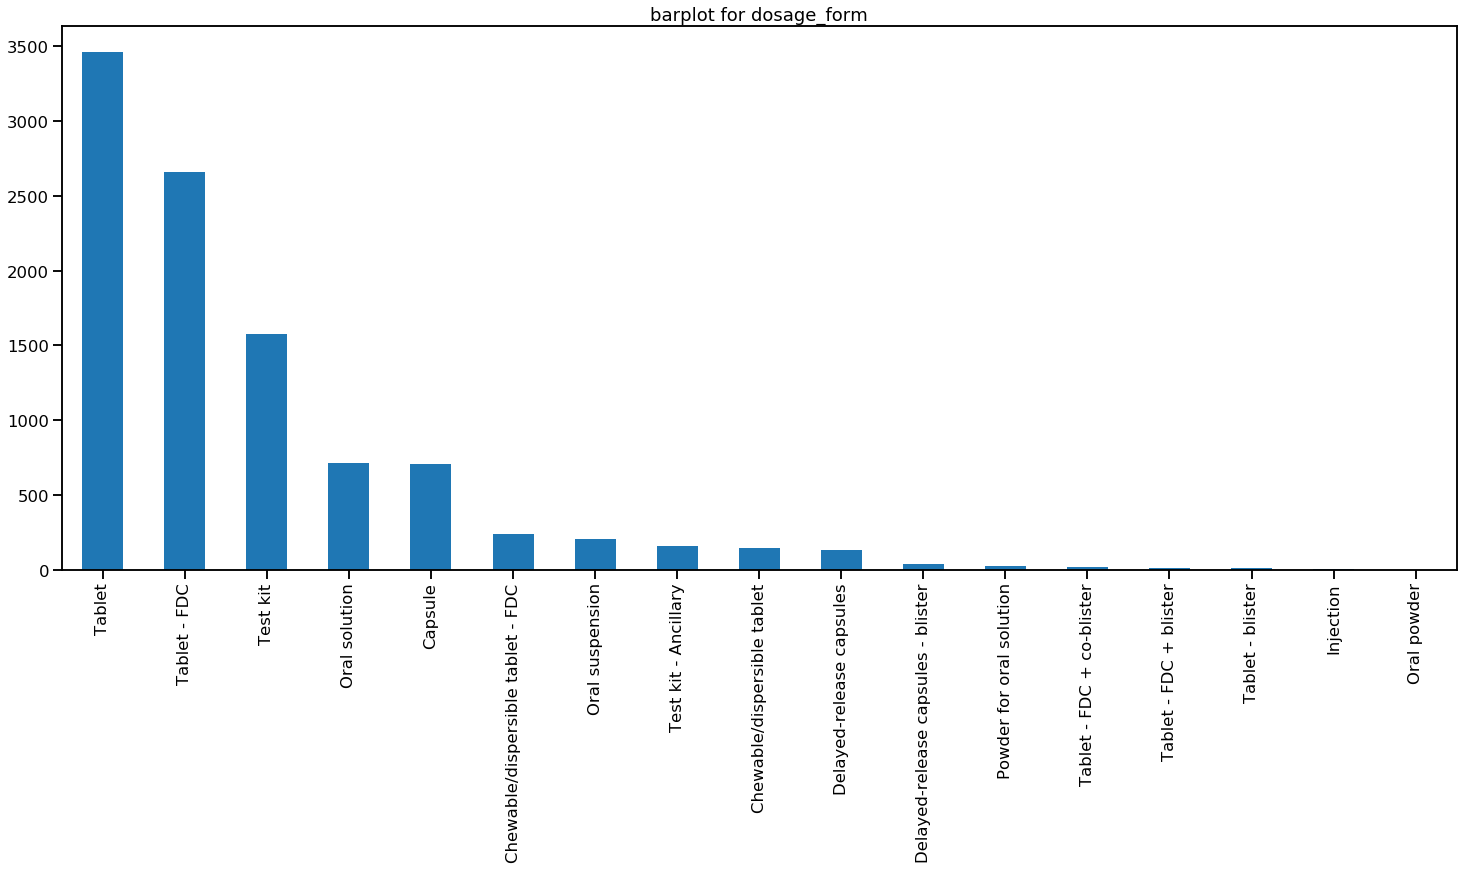

In [112]:
barplot(df["dosage_form"],"dosage_form")

In [113]:
#dropping dosage_form as it is dependent on other feature named dosage 
df.drop("dosage_form",axis=1,inplace=True)

### Unit_of_measure_(per_pack)

In [114]:
df["unit_of_measure_(per_pack)"].value_counts()

60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
18         4
2          4
5          4
168        3
36         3
12         2
24         2
160        1
144        1
48         1
Name: unit_of_measure_(per_pack), dtype: int64

### line_item_quantity

In [115]:
df["line_item_quantity"].value_counts().head()

10000    93
1000     91
100      85
2000     73
5000     69
Name: line_item_quantity, dtype: int64

In [116]:
df["line_item_quantity"].value_counts().tail()

6118      1
6110      1
16347     1
2004      1
206853    1
Name: line_item_quantity, dtype: int64

### Manufacturing_site

In [117]:
df["manufacturing_site"].value_counts().head()

Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Name: manufacturing_site, dtype: int64

In [118]:
df["manufacturing_site"].value_counts().tail()

Remedica, Limassol, Cyprus     1
Medochemie Factory A, CY       1
INVERNESS ORGENICS LINE        1
MedMira Inc.                   1
Gland Pharma, Hyderabad, IN    1
Name: manufacturing_site, dtype: int64

manufacturing_site
Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          215
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

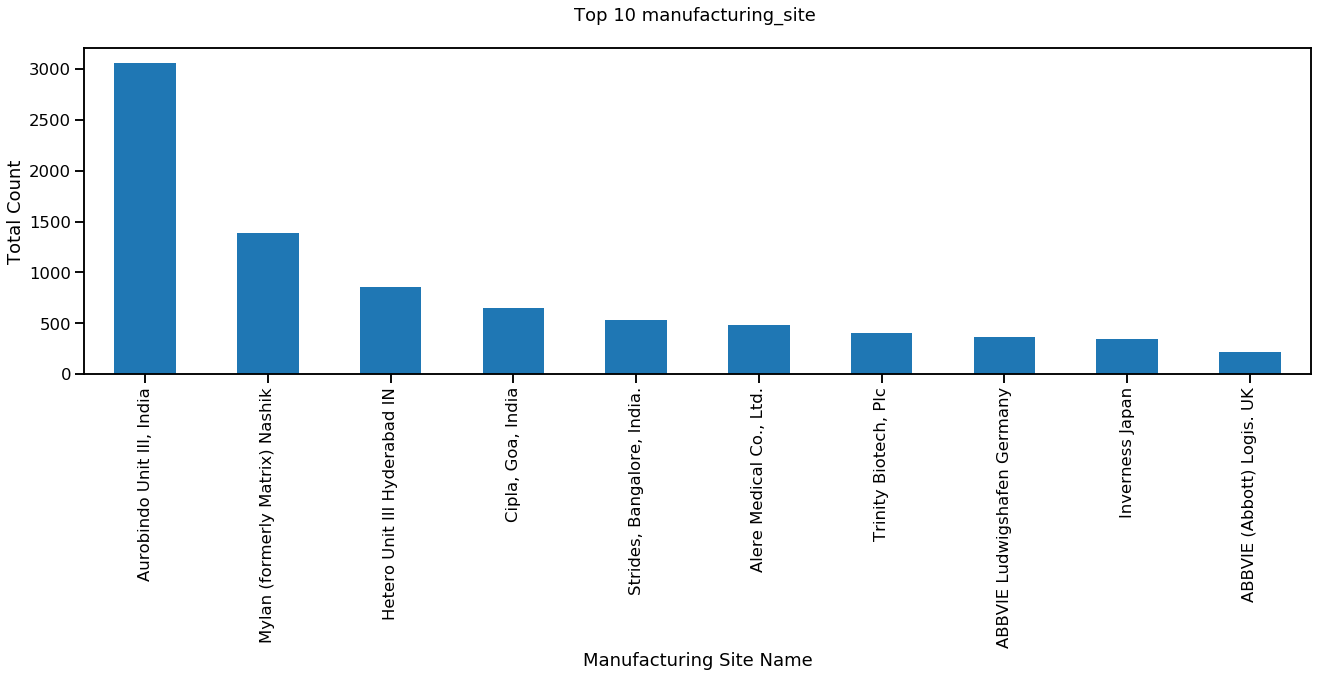

In [119]:
plt.figure(figsize=(22,6))
TopManufacturingSite=df.groupby('manufacturing_site').size().nlargest(10)
print(TopManufacturingSite)
TopManufacturingSite.plot(kind='bar')
plt.title('Top 10 manufacturing_site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [120]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=500:
        other_cat.append(key)  

In [121]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

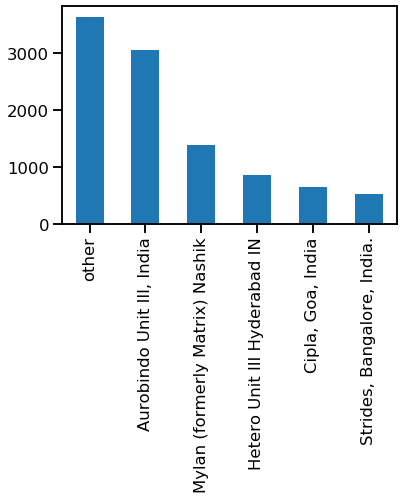

In [122]:
df["manufacturing_site"].value_counts().plot.bar()

### First_line_designation

In [123]:
df["first_line_designation"].value_counts()

Yes    6876
No     3243
Name: first_line_designation, dtype: int64

In [124]:
np.round(df["first_line_designation"].value_counts(normalize=True)*100,2)

Yes    67.95
No     32.05
Name: first_line_designation, dtype: float64

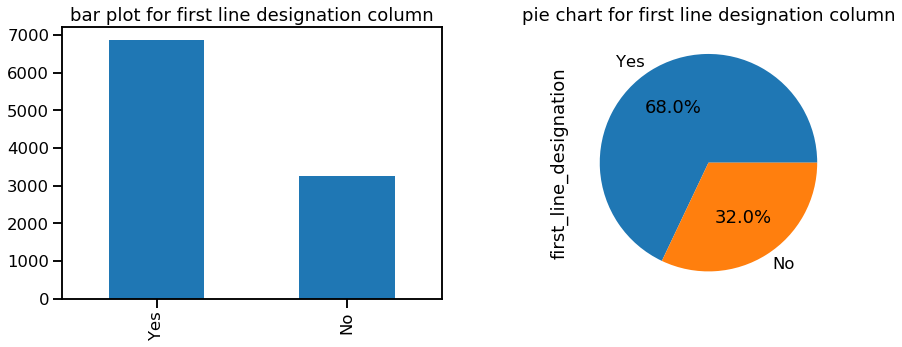

In [125]:
plot(df["first_line_designation"],"first line designation")

### Weight_(kilograms)

In [126]:
df["weight_(kilograms)"].value_counts().head(10)

Weight Captured Separately    1499
2                               29
6                               26
1                               21
60                              20
5                               20
3                               18
4                               18
14                              17
12                              17
Name: weight_(kilograms), dtype: int64

In [127]:
df["weight_(kilograms)"].value_counts().tail()

4900     1
578      1
3570     1
21463    1
4030     1
Name: weight_(kilograms), dtype: int64

In [128]:
df.drop("weight_(kilograms)",axis=1,inplace=True)

### freight_cost_(usd)

In [129]:
df["freight_cost_(usd)"].value_counts().head()

Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
13398.06                                16
Name: freight_cost_(usd), dtype: int64

In [130]:
df["freight_cost_(usd)"].value_counts().tail()

13257.79    1
6568.7      1
55886.43    1
8114.11     1
15759.47    1
Name: freight_cost_(usd), dtype: int64

In [131]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [132]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].apply(trans_freight_cost)

In [133]:
df["freight_cost_(usd)"].value_counts().head()

0           1671
9736.1        36
6147.18       27
13398.06      16
7329.83       12
Name: freight_cost_(usd), dtype: int64

In [134]:
df["freight_cost_(usd)"].describe()

count     7725
unique    5343
top          0
freq      1671
Name: freight_cost_(usd), dtype: int64

In [135]:
df.isna().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
pq_first_sent_to_client_date       0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
brand                              0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2394
shipment_mode                      0
line_item_insurance_(usd)          0
dtype: int64

In [136]:
median_value=df["freight_cost_(usd)"].median()
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace(np.nan,median_value)
df["freight_cost_(usd)"].head()

0      780.34
1      4521.5
2     1653.78
3    16007.06
4    45450.08
Name: freight_cost_(usd), dtype: object

In [137]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].astype("float")

Description of freight_cost_(usd)
----------------------------------------------------------------------------
count     10119.000000
mean       7536.104702
std       13156.759791
min           0.000000
25%        1211.490000
50%        3526.690000
75%        7783.400000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Skewness of freight_cost_(usd)
----------------------------------------------------------------------------
5.6617

 Histogram and Boxplot of freight_cost_(usd)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


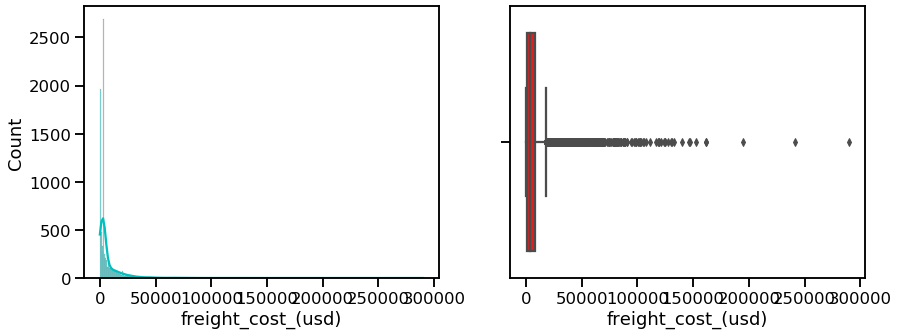

In [138]:
univariateAnalysis_numeric('freight_cost_(usd)',100)

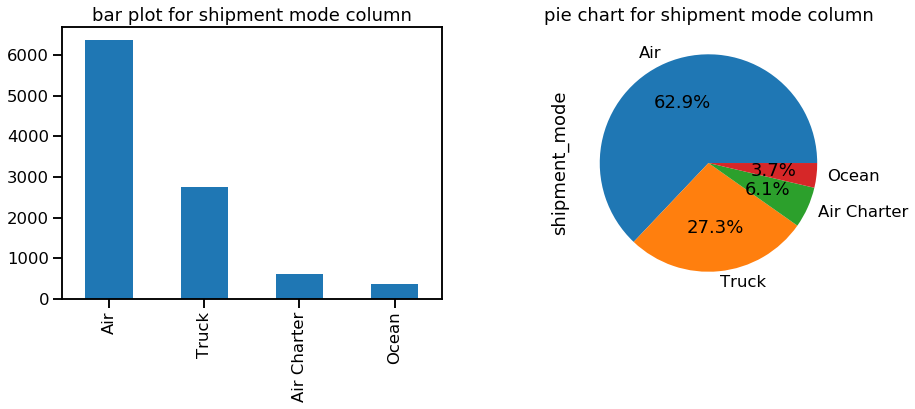

In [139]:
df["shipment_mode"].value_counts()

plot(df["shipment_mode"],"shipment mode")